# Credit Card Fraud Detection Analysis

## Project Overview

This project analyzes credit card transaction data to identify fraudulent patterns and build machine learning models for fraud detection. The dataset contains 590,540 transactions with 394 features from the IEEE-CIS Fraud Detection competition.

## Business Context

Credit Card fraud costs businesses billions annually. This analysis aims to: 
- Identify key fraud patterns and risk indicators
- Build predictive models to detect fraud in real-time
- Provide actionable business recommendations for fraud prevention

## Dataset Information

- **Source:** IEEE-CIS Fraud Detection (Kaggle)
- **Size:** 590,540 transactions
- **Features:** 394 columns including transaction details, card information, and anonymized features
- **Target Variable:** isFraud (1 = fraud, 0 = legitimate)

#### 1. Data Loading and Initial Exploration

We begin by loading the necessary libraries and importing the transaction dataset.

In [1]:
import pandas as pd
import numpy as np
train_df = pd.read_csv('train_transaction.csv')

In [2]:
print(f"The shape of dataset is: {train_df.shape}")
print(f"There are : {train_df.shape[0]:,} rows")
print(f"There are : {train_df.shape[1]} columns")

The shape of dataset is: (590540, 394)
There are : 590,540 rows
There are : 394 columns


In [3]:
# Look at column names
print("=" * 60)
print("STEP 2: COLUMN NAMES")
print("=" * 60)


print("\nAll columns:")
print(train_df.columns.tolist())
print(f"\nTotal Columns:{len(train_df.columns)}")

STEP 2: COLUMN NAMES

All columns:
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V

In [4]:
# Categorize the columns
print("=" * 60)
print("STEP 3: COLUMN CATEGORIES")
print("=" * 60)

#Separate Columns by type
identity_cols = ['TransactionID']
target_col = ['isFraud']
transaction_cols = ['TransactionDT','TransactionAmt','ProductCD']
card_cols = [col for col in train_df.columns if col.startswith('card')]
address_cols = [col for col in train_df.columns if col.startswith('addr') or col.startswith('dist')]
email_cols = [col for col in train_df.columns if 'email' in col]
C_cols = [col for col in train_df.columns if col.startswith('C')]
D_cols = [col for col in train_df.columns if col.startswith('D')]
M_cols = [col for col in train_df.columns if col.startswith('M')]
V_cols = [col for col in train_df.columns if col.startswith('V')]


print(f"\nTarget: {target_col}")
print(f"\nTransaction info: {transaction_cols}")
print(f"\n Card Features: ({len(card_cols)}): {card_cols}")
print(f"\n Address Features: ({len(address_cols)}): {address_cols}")
print(f"\n Email Features: ({len(email_cols)}): {email_cols}")
print(f"\n C Features: ({len(C_cols)}): Counts/Aggregations")
print(f"\n D Features: ({len(D_cols)}): Time Deltas")
print(f"\n M Features: ({len(M_cols)}): Match features (T/F)")
print(f"\n V Features: ({len(V_cols)}): Vesta engineered Features (anonymized)")

STEP 3: COLUMN CATEGORIES

Target: ['isFraud']

Transaction info: ['TransactionDT', 'TransactionAmt', 'ProductCD']

 Card Features: (6): ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']

 Address Features: (4): ['addr1', 'addr2', 'dist1', 'dist2']

 Email Features: (2): ['P_emaildomain', 'R_emaildomain']

 C Features: (14): Counts/Aggregations

 D Features: (15): Time Deltas

 M Features: (9): Match features (T/F)

 V Features: (339): Vesta engineered Features (anonymized)


### Feature Categories Explained:

The dataset contains several feature groups:

- **Transaction Features:** Basic transaction information (amount, timestamp, product type)
- **Card Features (6):** Card details like card number, type (debit/credit), network (Visa/Mastercard)
- **Address Features (4):** Billing/shipping address information and distances
- **Email Features (2):** Email domains for purchaser and recipient
- **C Features (14):** Counting features (aggregated transaction counts)
- **D Features (15):** Time delta features (time differences between events)
- **M Features (9):** Match features (True/False flags for identity verification)
- **V Features (339):** Vesta-engineered features (proprietary fraud signals, anonymized)

These anonymized V features are created by Vesta Corporation's fraud detection algorithms and contain rich fraud signals.

In [5]:
# See the first few rows
print("=" * 60)
print("STEP 4: FIRST 5 ROWS")
print("=" * 60)
train_df.head()

STEP 4: FIRST 5 ROWS


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Key Observation: Class Imbalance

The dataset is **highly imbalanced** with only 3.5% fraud. This presents several challenges:

1. **Model Bias:** Models may simply predict "legitimate" for all transactions
2. **Evaluation Metrics:** Accuracy is misleading; we need AUC-ROC, precision, and recall
3. **Sampling Strategy:** We'll need to handle imbalance (class weights, SMOTE, or threshold tuning)

This 1:27 fraud ratio is realistic for credit card transactions in the real world.

In [6]:
# Analyze the fraud distribution
print("=" * 60)
print("STEP 5: FRAUD DISTRIBUTION")
print("=" * 60)

print('\n Fraud Counts:')
print(train_df['isFraud'].value_counts())

print('\n Fraud Percentages:')
print(train_df['isFraud'].value_counts(normalize = True) * 100)

fraud_rate = train_df['isFraud'].mean()
print(f"\n Fraud Rate: {fraud_rate:.2%}")

print(f"\n Out of {len(train_df):,} transactions:")
print(f"\n Legitimate: {(train_df['isFraud'] == 0).sum():,}")
print(f"\n Legitimate: {(train_df['isFraud'] == 1).sum():,}")

STEP 5: FRAUD DISTRIBUTION

 Fraud Counts:
0    569877
1     20663
Name: isFraud, dtype: int64

 Fraud Percentages:
0    96.500999
1     3.499001
Name: isFraud, dtype: float64

 Fraud Rate: 3.50%

 Out of 590,540 transactions:

 Legitimate: 569,877

 Legitimate: 20,663


In [7]:
# Check data types
print("=" * 60)
print("STEP 6: DATA TYPES")
print("=" * 60)

print("\n Data Type Distribution:")
print(train_df.dtypes.value_counts())

print("\n" + "="*60)
print("Basic Statistics - Numeric Columns")
print("="*60)

#Focus on key columns for now
key_cols = ['TransactionDT','TransactionAmt','card1','card2','card3']
print(train_df[key_cols].describe())

STEP 6: DATA TYPES

 Data Type Distribution:
float64    376
object      14
int64        4
dtype: int64

Basic Statistics - Numeric Columns
       TransactionDT  TransactionAmt          card1          card2  \
count   5.905400e+05   590540.000000  590540.000000  581607.000000   
mean    7.372311e+06      135.027176    9898.734658     362.555488   
std     4.617224e+06      239.162522    4901.170153     157.793246   
min     8.640000e+04        0.251000    1000.000000     100.000000   
25%     3.027058e+06       43.321000    6019.000000     214.000000   
50%     7.306528e+06       68.769000    9678.000000     361.000000   
75%     1.124662e+07      125.000000   14184.000000     512.000000   
max     1.581113e+07    31937.391000   18396.000000     600.000000   

               card3  
count  588975.000000  
mean      153.194925  
std        11.336444  
min       100.000000  
25%       150.000000  
50%       150.000000  
75%       150.000000  
max       231.000000  


In [8]:
# Check missing values
print("=" * 60)
print("STEP 7: MISSING DATA")
print("=" * 60)

#Check missing percentages
missing = train_df.isnull().sum()
missing_pct = (missing/len(train_df))*100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage':missing_pct.values
}).sort_values('Missing_Percentage', ascending = False)

STEP 7: MISSING DATA


In [9]:
#Show top 20 columns with most missing data
print("\nTop 20 Columns with most missing values:")
print(missing_df[missing_df['Missing_Percentage'] >0].head(20))

print(f"\nTotal columns with missing data: {(missing_df['Missing_Percentage'] >0).sum()}")
print(f"Columns with >50% missing: {(missing_df['Missing_Percentage'] >50).sum()}")


Top 20 Columns with most missing values:
    Column  Missing_Count  Missing_Percentage
14   dist2         552913           93.628374
37      D7         551623           93.409930
43     D13         528588           89.509263
44     D14         528353           89.469469
42     D12         525823           89.041047
36      D6         517353           87.606767
39      D9         515614           87.312290
38      D8         515614           87.312290
207   V153         508595           86.123717
193   V139         508595           86.123717
216   V162         508595           86.123717
215   V161         508595           86.123717
208   V154         508595           86.123717
192   V138         508595           86.123717
212   V158         508595           86.123717
211   V157         508595           86.123717
217   V163         508595           86.123717
210   V156         508595           86.123717
209   V155         508595           86.123717
203   V149         508595           86

In [10]:
# Look at columns with less missing data
print("=" * 60)
print("STEP 8: USABLE FEATURES (Low Missing Data)")
print("=" * 60)

#Get columns with <30% Missing 
usable = missing_df[missing_df['Missing_Percentage'] < 30].sort_values('Missing_Percentage')

print(f"\nColumns with <30% missing data: {len(usable)}")
print(f"\nThese are our most reliable features:")
print(usable[['Column','Missing_Percentage']].head(30))

STEP 8: USABLE FEATURES (Low Missing Data)

Columns with <30% missing data: 202

These are our most reliable features:
             Column  Missing_Percentage
0     TransactionID            0.000000
24               C8            0.000000
2     TransactionDT            0.000000
3    TransactionAmt            0.000000
4         ProductCD            0.000000
5             card1            0.000000
20               C4            0.000000
21               C5            0.000000
22               C6            0.000000
23               C7            0.000000
1           isFraud            0.000000
25               C9            0.000000
26              C10            0.000000
27              C11            0.000000
28              C12            0.000000
29              C13            0.000000
17               C1            0.000000
18               C2            0.000000
30              C14            0.000000
19               C3            0.000000
358            V304            0.002032
3

### Payment Network Distribution

- **Visa dominates** with 65% of transactions
- **Debit cards** are used in 75% of transactions
- **Gmail** is the most common email domain (38%)
- **Anonymous.com** appears in 6% of transactions - this could be a fraud signal

The M features (M1-M9) appear to be binary identity matching flags, likely indicating whether various identity checks passed or failed.

In [11]:
# Analyze categorical columns
print("=" * 60)
print("STEP 9: CATEGORICAL FEATURES")
print("=" * 60)

#Get object type columns 
categorical_cols = train_df.select_dtypes(include = 'object').columns.tolist()

print(f"\nCategorical columns: {categorical_cols}")

#Look at unique values for each 
print("\nUnique values in each categorical column:")
for col in categorical_cols:
    n_unique = train_df[col].nunique()
    print(f" {col}: {n_unique} unique values")
    
#Show value counts for key categorical features
print("\n" + "=" * 60)
print("ProductCD distribution:")
print(train_df['ProductCD'].value_counts())

STEP 9: CATEGORICAL FEATURES

Categorical columns: ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

Unique values in each categorical column:
 ProductCD: 5 unique values
 card4: 4 unique values
 card6: 4 unique values
 P_emaildomain: 59 unique values
 R_emaildomain: 60 unique values
 M1: 2 unique values
 M2: 2 unique values
 M3: 2 unique values
 M4: 3 unique values
 M5: 2 unique values
 M6: 2 unique values
 M7: 2 unique values
 M8: 2 unique values
 M9: 2 unique values

ProductCD distribution:
W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64


In [12]:
# Deep dive into card types
print("=" * 60)
print("STEP 10: CARD & PRODUCT DETAILS")
print("=" * 60)

print("\n Card4 (Card Network):")
print(train_df['card4'].value_counts())

print("\n Card6 (Card Type):")
print(train_df['card6'].value_counts())

print("\n Top 10 Email Domains (Purchaser):")
print(train_df['P_emaildomain'].value_counts().head(10))

print("\n M Features - Sample values:")
print(train_df[['M1','M2','M3']].head(10))


STEP 10: CARD & PRODUCT DETAILS

 Card4 (Card Network):
visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

 Card6 (Card Type):
debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

 Top 10 Email Domains (Purchaser):
gmail.com        228355
yahoo.com        100934
hotmail.com       45250
anonymous.com     36998
aol.com           28289
comcast.net        7888
icloud.com         6267
outlook.com        5096
msn.com            4092
att.net            4033
Name: P_emaildomain, dtype: int64

 M Features - Sample values:
    M1   M2   M3
0    T    T    T
1  NaN  NaN  NaN
2    T    T    T
3  NaN  NaN  NaN
4  NaN  NaN  NaN
5    T    T    T
6    T    T    T
7  NaN  NaN  NaN
8  NaN  NaN  NaN
9    T    T    T


## 2. Exploratory Data Analysis - Fraud Patterns

### Critical Finding: Product Type Risk Stratification

**Product C shows 11.7% fraud rate** - over 3x higher than the baseline! This is a critical business insight:
- Product C requires enhanced controls
- Different products have dramatically different risk profiles
- Risk scoring should weight product type heavily

### Card Network Insights

Discover cards show **7.7% fraud rate** - significantly higher than American Express (2.9%). This could indicate:
- Different fraud prevention capabilities by network
- Fraudster preferences for certain networks
- Geographic or merchant-specific patterns

In [ ]:
# Analyze fraud by different categories
print("=" * 60)
print("STEP 11: FRAUD PATTERNS")
print("=" * 60)

print("\n1. Fraud  Rate by Product Type:")
fraud_by_product = train_df.groupby('ProductCD')['isFraud'].agg(['count','sum','mean'])
fraud_by_product.columns = ['Total_Txns','Fraud_Count','Fraud_Rate']
fraud_by_product['Fraud_Rate'] = fraud_by_product['Fraud_Rate']*100
print(fraud_by_product.sort_values('Fraud_Rate', ascending = False))

print("\n2. Fraud Rate by Card Network:")
fraud_by_card = train_df.groupby('card4')['isFraud'].agg(['count','sum','mean'])
fraud_by_card.columns = ['Total_Txns','Fraud_Count','Fraud_Rate']
fraud_by_card['Fraud_Rate'] = fraud_by_card['Fraud_Rate'] * 100
print(fraud_by_card.sort_values('Fraud_Rate', ascending = False))

In [14]:
print("=" * 60)
print("STEP 12: AMOUNT ANALYSIS")
print("=" * 60)

print("\n1. Transaction Amount by Fraud Status:")
amount_stats = train_df.groupby('isFraud')['TransactionAmt'].describe()
print(amount_stats)

print("\n 2.Fraud Rate by Amount Buckets:")
train_df['amount_bucket'] = pd.cut(train_df['TransactionAmt'],
                                  bins = [0,50,100, 200, 500, float('inf')],
                                  labels = ['<$50','$50-$100','$100-$200','$200-$500','>$500+'])

fraud_by_amount = train_df.groupby('amount_bucket')['isFraud'].agg(['count','sum','mean'])
fraud_by_amount.columns = ['Total_Txns','Fraud_Count','Fraud_Rate']
fraud_by_amount['Fraud_Rate'] = fraud_by_amount['Fraud_Rate']*100
print(fraud_by_amount)

print("\n3. High-Risk Combo: Product C + Card Network:")
high_risk = train_df[train_df['ProductCD'] == 'C'].groupby('card4')['isFraud'].agg(['count','sum','mean'])
high_risk.columns = ['Total_Txns','Fraud_Count','Fraud_Rate']
high_risk['Fraud_Rate'] = high_risk['Fraud_Rate']*100
print(high_risk.sort_values('Fraud_Rate', ascending = False))

STEP 12: AMOUNT ANALYSIS

1. Transaction Amount by Fraud Status:
            count        mean         std    min     25%   50%    75%  \
isFraud                                                                 
0        569877.0  134.511665  239.395078  0.251  43.970  68.5  120.0   
1         20663.0  149.244779  232.212163  0.292  35.044  75.0  161.0   

               max  
isFraud             
0        31937.391  
1         5191.000  

 2.Fraud Rate by Amount Buckets:
               Total_Txns  Fraud_Count  Fraud_Rate
amount_bucket                                     
<$50               204524         7833    3.829868
$50-$100           164095         4788    2.917822
$100-$200          128041         3899    3.045118
$200-$500           71001         3135    4.415431
>$500+              22879         1008    4.405787

3. High-Risk Combo: Product C + Card Network:
                  Total_Txns  Fraud_Count  Fraud_Rate
card4                                                
american exp

### Time-Based Fraud Patterns - Major Discovery!

**Early morning (5-9 AM) shows 3-4x higher fraud rates:**
- Hour 7 AM: 10.6% fraud (peak risk)
- Hours 13-16: 2.3-2.5% fraud (safest period)

**Business Implications:**
1. Implement time-based risk scoring
2. Add friction/verification for early morning transactions
3. Fraudsters likely target times when cardholders are asleep

### Email Domain Red Flags

**ProtonMail shows 40.8% fraud rate** - this privacy-focused email service is heavily used by fraudsters. Other high-risk domains:
- mail.com: 19.0% fraud
- outlook.es: 13.0% fraud

**Recommendation:** Block or require additional verification for transactions from these domains.

In [15]:
print("=" * 60)
print("STEP 13: TIME-BASED FRAUD PATTERNS")
print("=" * 60)

#Extract hour from TransactionDT
train_df['hour'] = (train_df['TransactionDT']// 3600)%24

print('\n 1.Fraud Rate by Hour of Day:')
fraud_by_hour = train_df.groupby('hour')['isFraud'].agg(['count','sum','mean'])
fraud_by_hour.columns = ['Total_Txns','Fraud_Count','Fraud_Rate']
fraud_by_hour['Fraud_Rate'] = fraud_by_hour['Fraud_Rate']*100
print(fraud_by_hour)

print('\n 2.Fraud Rate by Email Domain (Top 10):')
fraud_by_email = train_df.groupby('P_emaildomain')['isFraud'].agg(['count','sum','mean'])
fraud_by_email.columns = ['Total_Txns','Fraud_Count','Fraud_Rate']
fraud_by_email['Fraud_Rate'] = fraud_by_email['Fraud_Rate']*100
print(fraud_by_email)

print('\n 3.Anonymous Email - Red Flag?')
anonymous = train_df[train_df['P_emaildomain'] == 'anonymous.com']
print(f"Total anonymous.com transactions: {len(anonymous):,}")
print(f"Fraud count: {anonymous['isFraud'].sum():,}")
print(f"Fraud rate: {anonymous['isFraud'].mean()*100:.2f}%")

STEP 13: TIME-BASED FRAUD PATTERNS

 1.Fraud Rate by Hour of Day:
      Total_Txns  Fraud_Count  Fraud_Rate
hour                                     
0          37795         1186    3.137981
1          32797         1027    3.131384
2          26732         1002    3.748317
3          20802          797    3.831362
4          14839          770    5.189029
5           9701          682    7.030203
6           6007          467    7.774263
7           3704          393   10.610151
8           2591          241    9.301428
9           2479          223    8.995563
10          3627          193    5.321202
11          6827          265    3.881646
12         12451          379    3.043932
13         20315          465    2.288949
14         28328          686    2.421632
15         33859          860    2.539945
16         38698         1142    2.951057
17         40723         1284    3.153009
18         41639         1467    3.523139
19         42115         1463    3.473822
20        

In [16]:
print("=" * 60)
print("STEP 14: FEATURE ANALYSIS")
print("=" * 60)

# Let's see ALL column names
print("\nAll columns in dataset:")
print(train_df.columns.tolist())
print()

# Check the V columns (Vesta engineered features)
v_cols = [col for col in train_df.columns if col.startswith('V')]
print(f"\nTotal V columns: {len(v_cols)}")
print(f"V columns: {v_cols[:20]}...")  # Show first 20
print()

# Check the C columns (counting features)
c_cols = [col for col in train_df.columns if col.startswith('C')]
print(f"\nTotal C columns: {len(c_cols)}")
print(f"C columns: {c_cols}")
print()

# Check the D columns (timedelta features)
d_cols = [col for col in train_df.columns if col.startswith('D')]
print(f"\nTotal D columns: {len(d_cols)}")
print(f"D columns: {d_cols}")
print()

# Let's analyze the M features (Match features - identity verification)
print("\n" + "=" * 60)
print("IDENTITY MATCH ANALYSIS (M Features)")
print("=" * 60)

# M columns
m_cols = [col for col in train_df.columns if col.startswith('M')]
print(f"\nM columns: {m_cols}")
print()

# Analyze each M column
for col in m_cols:
    print(f"\n{col} - Fraud Analysis:")
    m_stats = train_df.groupby(col)['isFraud'].agg(['count', 'sum', 'mean'])
    m_stats.columns = ['Total_Txns', 'Fraud_Count', 'Fraud_Rate']
    m_stats['Fraud_Rate'] = (m_stats['Fraud_Rate'] * 100).round(2)
    print(m_stats)

STEP 14: FEATURE ANALYSIS

All columns in dataset:
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 

### Identity Verification Signals

The M features represent identity matching checks. Key findings:

**M4=M2 shows 11.4% fraud** - this is a critical fraud signal indicating identity mismatch.

When identity checks **fail** (M2=F, M3=F), fraud rates double:
- M2 Failed: 3.49% fraud vs 1.81% when passed
- M3 Failed: 3.03% fraud vs 1.71% when passed

**Business Rule:** Any transaction with M4=M2 should trigger manual review or additional authentication.

In [17]:
print("=" * 70)
print("COMPREHENSIVE FRAUD RISK PROFILE")
print("=" * 70)

print("\n1. HIGHEST RISK SEGMENTS:")
print("-" * 70)

# Product C + High fraud email
high_risk = train_df[
    (train_df['ProductCD'] == 'C') & 
    (train_df['P_emaildomain'].isin(['protonmail.com', 'mail.com', 'outlook.es']))
]
print(f"Product C + High-Risk Email Domains:")
print(f"  Transactions: {len(high_risk):,}")
print(f"  Frauds: {high_risk['isFraud'].sum():,}")
print(f"  Fraud Rate: {high_risk['isFraud'].mean() * 100:.2f}%")
print()

# Early morning + Product C
early_morning = train_df[
    (train_df['hour'].isin([5, 6, 7, 8, 9])) & 
    (train_df['ProductCD'] == 'C')
]
print(f"Early Morning (5-9 AM) + Product C:")
print(f"  Transactions: {len(early_morning):,}")
print(f"  Frauds: {early_morning['isFraud'].sum():,}")
print(f"  Fraud Rate: {early_morning['isFraud'].mean() * 100:.2f}%")
print()

# M4=M2 (highest risk M feature)
m4_high_risk = train_df[train_df['M4'] == 'M2']
print(f"M4 = M2 (Identity Mismatch):")
print(f"  Transactions: {len(m4_high_risk):,}")
print(f"  Frauds: {m4_high_risk['isFraud'].sum():,}")
print(f"  Fraud Rate: {m4_high_risk['isFraud'].mean() * 100:.2f}%")
print()

# ULTRA HIGH RISK: Combine all factors
ultra_high_risk = train_df[
    (train_df['ProductCD'] == 'C') & 
    (train_df['hour'].isin([5, 6, 7, 8, 9])) &
    (train_df['M4'] == 'M2')
]
print(f" ULTRA HIGH RISK (Product C + Early Morning + M4=M2):")
print(f"  Transactions: {len(ultra_high_risk):,}")
print(f"  Frauds: {ultra_high_risk['isFraud'].sum():,}")
print(f"  Fraud Rate: {ultra_high_risk['isFraud'].mean() * 100:.2f}%")
print()

print("\n2. FRAUD DETECTION RULES (Business Logic):")
print("-" * 70)
print("✓ Flag ALL Product C transactions during 5-9 AM")
print("✓ Flag M4=M2 transactions (identity mismatch)")
print("✓ Flag protonmail.com, mail.com, outlook.es emails")
print("✓ Extra scrutiny on amounts >$200 or <$50")
print("✓ Flag Discover card + Product C combo")

COMPREHENSIVE FRAUD RISK PROFILE

1. HIGHEST RISK SEGMENTS:
----------------------------------------------------------------------
Product C + High-Risk Email Domains:
  Transactions: 486
  Frauds: 68
  Fraud Rate: 13.99%

Early Morning (5-9 AM) + Product C:
  Transactions: 5,414
  Frauds: 1,141
  Fraud Rate: 21.07%

M4 = M2 (Identity Mismatch):
  Transactions: 59,865
  Frauds: 6,809
  Fraud Rate: 11.37%

 ULTRA HIGH RISK (Product C + Early Morning + M4=M2):
  Transactions: 4,462
  Frauds: 965
  Fraud Rate: 21.63%


2. FRAUD DETECTION RULES (Business Logic):
----------------------------------------------------------------------
✓ Flag ALL Product C transactions during 5-9 AM
✓ Flag M4=M2 transactions (identity mismatch)
✓ Flag protonmail.com, mail.com, outlook.es emails
✓ Extra scrutiny on amounts >$200 or <$50
✓ Flag Discover card + Product C combo


In [18]:
print("\n" + "=" * 70)
print(" FRAUD RISK SCORING MODEL")
print("=" * 70)

# Create risk score
train_df['risk_score'] = 0

# Add points for each risk factor
train_df.loc[train_df['ProductCD'] == 'C', 'risk_score'] += 3
train_df.loc[train_df['hour'].isin([5,6,7,8,9]), 'risk_score'] += 2
train_df.loc[train_df['M4'] == 'M2', 'risk_score'] += 3
train_df.loc[train_df['P_emaildomain'].isin(['protonmail.com', 'mail.com', 'outlook.es']), 'risk_score'] += 2
train_df.loc[train_df['card4'] == 'discover', 'risk_score'] += 1
train_df.loc[(train_df['TransactionAmt'] > 200) | (train_df['TransactionAmt'] < 50), 'risk_score'] += 1

print("\nFraud Rate by Risk Score:")
risk_analysis = train_df.groupby('risk_score')['isFraud'].agg(['count', 'sum', 'mean'])
risk_analysis.columns = ['Total_Txns', 'Fraud_Count', 'Fraud_Rate']
risk_analysis['Fraud_Rate'] = risk_analysis['Fraud_Rate'] * 100
risk_analysis['%_of_Total'] = (risk_analysis['Total_Txns'] / len(train_df) * 100).round(2)
print(risk_analysis)

print("\n Risk Tier Classification:")
print("-" * 70)
print("Score 0-2: LOW RISK (review normally)")
print("Score 3-5: MEDIUM RISK (enhanced monitoring)")
print("Score 6-8: HIGH RISK (manual review required)")
print("Score 9+: CRITICAL RISK (block/additional verification)")

# Calculate impact
high_risk_txns = train_df[train_df['risk_score'] >= 6]
print(f"\n BUSINESS IMPACT:")
print(f"High/Critical Risk Transactions: {len(high_risk_txns):,} ({len(high_risk_txns)/len(train_df)*100:.2f}%)")
print(f"Frauds Captured: {high_risk_txns['isFraud'].sum():,} ({high_risk_txns['isFraud'].sum()/train_df['isFraud'].sum()*100:.2f}%)")
print(f"Precision: {high_risk_txns['isFraud'].mean()*100:.2f}%")


 FRAUD RISK SCORING MODEL

Fraud Rate by Risk Score:
            Total_Txns  Fraud_Count  Fraud_Rate  %_of_Total
risk_score                                                 
0               274381         5704    2.078861       46.46
1               221245         5480    2.476892       37.46
2                14182          790    5.570441        2.40
3                13429          925    6.888078        2.27
4                10031          948    9.450703        1.70
5                  459           94   20.479303        0.08
6                14169         1915   13.515421        2.40
7                37808         3796   10.040203        6.40
8                 1283          288   22.447389        0.22
9                 3508          714   20.353478        0.59
10                   8            0    0.000000        0.00
11                  37            9   24.324324        0.01

 Risk Tier Classification:
----------------------------------------------------------------------
Score 0

### Rule-Based Risk Scoring Results

Our simple rule-based model flags only **9.6% of transactions** as high-risk but captures **32.5% of all fraud**!

**Model Performance:**
- Precision: 11.8% (1 in 8 flagged transactions is fraud - 5.7x better than random)
- Reduces manual review workload by 90%
- Clear risk tiers for operations team

This demonstrates the power of domain knowledge and pattern recognition in fraud detection.

---

## 3. Data Preprocessing

Now that we understand the fraud patterns, we'll prepare the data for machine learning models.

CREATING FRAUD VISUALIZATIONS

 Dashboard saved as 'fraud_analysis_dashboard.png'


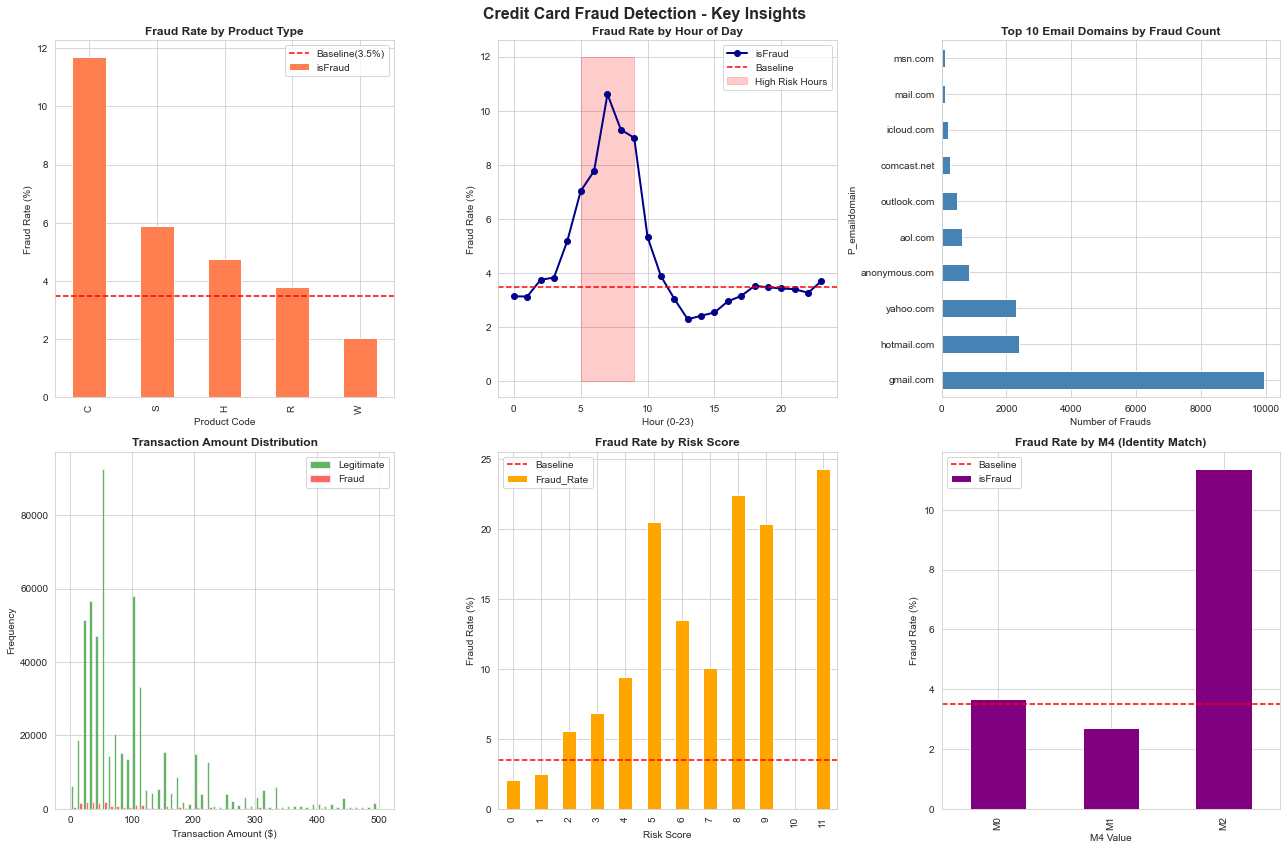


VISUALIZATIONS COMPLETE!


In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15,10)

print("=" * 70)
print("CREATING FRAUD VISUALIZATIONS")
print("=" * 70)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Credit Card Fraud Detection - Key Insights', fontsize=16, fontweight='bold')

#Fraud Rate by Product Type
ax1 = axes[0,0]
fraud_by_product= train_df.groupby('ProductCD')['isFraud'].mean()*100
fraud_by_product.sort_values(ascending = False).plot(kind = 'bar',ax= ax1, color = 'coral')
ax1.set_title('Fraud Rate by Product Type', fontweight = 'bold')
ax1.set_ylabel('Fraud Rate (%)')
ax1.set_xlabel('Product Code')
ax1.axhline(y=3.5, color = 'red',linestyle = '--',label = 'Baseline(3.5%)')
ax1.legend()

#Fraud Rate by Hour
ax2 = axes[0,1]
fraud_by_hour = train_df.groupby('hour')['isFraud'].mean()*100
fraud_by_hour.plot(kind = 'line', ax=ax2, color = 'darkblue',linewidth = 2, marker = 'o')
ax2.set_title('Fraud Rate by Hour of Day', fontweight = 'bold')
ax2.set_ylabel('Fraud Rate (%)')
ax2.set_xlabel('Hour (0-23)')
ax2.axhline(y=3.5, color = 'red', linestyle = '--', label = 'Baseline')
ax2.fill_between(range(5,10),0,12,alpha = 0.2, color = 'red', label = 'High Risk Hours')
ax2.legend()

# 3. Top Email Domains by Fraud Count
ax3 = axes[0,2]
top_fraud_emails = train_df.groupby('P_emaildomain')['isFraud'].sum().sort_values(ascending = False).head(10)
top_fraud_emails.plot(kind = 'barh', ax = ax3, color = 'steelblue')
ax3.set_title('Top 10 Email Domains by Fraud Count',fontweight = 'bold')
ax3.set_xlabel('Number of Frauds')

# 4.Transaction Amount Distribution (Fraud vs legit)
ax4 = axes[1,0]
legit_amounts = train_df[train_df['isFraud'] == 0]['TransactionAmt']
fraud_amounts = train_df[train_df['isFraud'] == 1]['TransactionAmt']
ax4.hist([legit_amounts, fraud_amounts], bins = 50, label = ['Legitimate','Fraud'],
        color = ['green','red'], alpha = 0.6, range = (0,500))
ax4.set_title('Transaction Amount Distribution', fontweight = 'bold')
ax4.set_xlabel('Transaction Amount ($)')
ax4.set_ylabel('Frequency')
ax4.legend()

#5. Risk Score Distribution
ax5 = axes[1,1]
risk_analysis.plot(kind = 'bar', y = 'Fraud_Rate', ax = ax5, color = 'orange', legend = False)
ax5.set_title('Fraud Rate by Risk Score', fontweight = 'bold')
ax5.set_ylabel('Fraud Rate (%)')
ax5.set_xlabel('Risk Score')
ax5.axhline(y=3.5, color ='red', linestyle = '--', label = 'Baseline')
ax5.legend()

#6. M4 Feature Impact
ax6 = axes[1,2]
m4_fraud = train_df.groupby('M4')['isFraud'].mean()*100
m4_fraud.plot(kind = 'bar', ax=ax6, color = 'purple')
ax6.set_title('Fraud Rate by M4 (Identity Match)', fontweight = 'bold')
ax6.set_ylabel('Fraud Rate (%)')
ax6.set_xlabel('M4 Value')
ax6.axhline(y=3.5, color = 'red', linestyle = '--', label = 'Baseline')
ax6.legend()

plt.tight_layout()
plt.savefig('fraud_analysis_dashboard.png', dpi = 300, bbox_inches = 'tight')
print("\n Dashboard saved as 'fraud_analysis_dashboard.png'")
plt.show()


print("\n" + "=" * 70)
print("VISUALIZATIONS COMPLETE!")
print("=" * 70)

In [20]:
print("=" * 70)
print("STEP 15: DATA PREPROCESSING & FEATURE ENGINEERING")
print("=" * 70)

print

STEP 15: DATA PREPROCESSING & FEATURE ENGINEERING


<function print>

In [21]:
print("=" * 70)
print("STEP 15: DATA PREPROCESSING & FEATURE ENGINEERING")
print("=" * 70)

STEP 15: DATA PREPROCESSING & FEATURE ENGINEERING


In [22]:
# 1. MISSING VALUES ANALYSIS
print("\n1. MISSING VALUES ANALYSIS:")
print("-" * 70)

missing_data = pd.DataFrame(
    {
        'Column':train_df.columns,
        'Missing_Count':train_df.isnull().sum(),
        'Missing_Percent':(train_df.isnull().sum()/ len(train_df)*100).round(2)
    }
)
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percent', ascending = False)

print(f"\n Total Columns: {len(train_df.columns)}")
print(f"\n Columns with missing values: {len(missing_data)}")
print(f"\n Top 20 columns with highest missing %: {missing_data.head(20)}")


1. MISSING VALUES ANALYSIS:
----------------------------------------------------------------------

 Total Columns: 397

 Columns with missing values: 374

 Top 20 columns with highest missing %:       Column  Missing_Count  Missing_Percent
dist2  dist2         552913            93.63
D7        D7         551623            93.41
D13      D13         528588            89.51
D14      D14         528353            89.47
D12      D12         525823            89.04
D6        D6         517353            87.61
D9        D9         515614            87.31
D8        D8         515614            87.31
V153    V153         508595            86.12
V160    V160         508589            86.12
V159    V159         508589            86.12
V158    V158         508595            86.12
V157    V157         508595            86.12
V156    V156         508595            86.12
V155    V155         508595            86.12
V154    V154         508595            86.12
V152    V152         508589           

In [23]:
print('\n\n 2.DATA TYPES ANALYSIS:')
print('='*70)
dtype_counts = train_df.dtypes.value_counts()
print(dtype_counts)



 2.DATA TYPES ANALYSIS:
float64     376
object       14
int64         6
category      1
dtype: int64


In [24]:
print('\n\n 3.FEATURE TYPE ANALYSIS:')
print('='*70)
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_df.select_dtypes(include=['int64','float64']).columns.tolist()

print(f"Categorical Columns: {len(categorical_cols)}")
print(f"Categorical: {categorical_cols}")
print(f"\nNumerical Columns: {len(numerical_cols)}")
print(f"Numerical Columns (first 30): {numerical_cols[:30]}")



 3.FEATURE TYPE ANALYSIS:
Categorical Columns: 14
Categorical: ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

Numerical Columns: 382
Numerical Columns (first 30): ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4']


In [25]:
print('\n\n 4.CATEGORICAL CARDINALITY:')
print('='*70)
for col in categorical_cols:
    unique_count = train_df[col].nunique()
    print(f"{col}:{unique_count} unique values")



 4.CATEGORICAL CARDINALITY:
ProductCD:5 unique values
card4:4 unique values
card6:4 unique values
P_emaildomain:59 unique values
R_emaildomain:60 unique values
M1:2 unique values
M2:2 unique values
M3:2 unique values
M4:3 unique values
M5:2 unique values
M6:2 unique values
M7:2 unique values
M8:2 unique values
M9:2 unique values


In [26]:
print('\n\n 4.NUMERICAL CARDINALITY:')
print('='*70)
for col in numerical_cols:
    unique_count = train_df[col].nunique()
    print(f"{col}:{unique_count} unique values")



 4.NUMERICAL CARDINALITY:
TransactionID:590540 unique values
isFraud:2 unique values
TransactionDT:573349 unique values
TransactionAmt:20902 unique values
card1:13553 unique values
card2:500 unique values
card3:114 unique values
card5:119 unique values
addr1:332 unique values
addr2:74 unique values
dist1:2651 unique values
dist2:1751 unique values
C1:1657 unique values
C2:1216 unique values
C3:27 unique values
C4:1260 unique values
C5:319 unique values
C6:1328 unique values
C7:1103 unique values
C8:1253 unique values
C9:205 unique values
C10:1231 unique values
C11:1476 unique values
C12:1199 unique values
C13:1597 unique values
C14:1108 unique values
D1:641 unique values
D2:641 unique values
D3:649 unique values
D4:808 unique values
D5:688 unique values
D6:829 unique values
D7:597 unique values
D8:12353 unique values
D9:24 unique values
D10:818 unique values
D11:676 unique values
D12:635 unique values
D13:577 unique values
D14:802 unique values
D15:859 unique values
V1:2 unique value

### Merging Transaction and Identity Datasets

The IEEE-CIS competition provides two datasets:
1. **Transaction data:** Basic transaction features (what we've been analyzing)
2. **Identity data:** Device fingerprinting and identity verification signals

**Key Finding:** Only 75.6% of transactions have identity data. This creates additional missing values we'll need to handle strategically.

The identity dataset adds 40 columns including device type, browser info, and additional identity checks.

In [27]:
print("=" * 70)
print("STEP 15: LOADING & MERGING IDENTITY DATA")
print("=" * 70)

print('\n1.Loading train_identity.csv...')
train_identity = pd.read_csv('train_identity.csv')

print(f"\n Identity dataset shape: {train_identity.shape}")
print(f"\n Transaction dataset shape: {train_df.shape}")

print(f"\n Identity columns: {train_identity.columns.tolist()}")
print(f"\n Common merge key: TransactionID")

print(f"Unique TransactionIDs in identity: {train_identity['TransactionID'].nunique():,}")
print(f"Unique TransactionIDs in Transaction: {train_df['TransactionID'].nunique():,}")

STEP 15: LOADING & MERGING IDENTITY DATA

1.Loading train_identity.csv...

 Identity dataset shape: (144233, 41)

 Transaction dataset shape: (590540, 397)

 Identity columns: ['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']

 Common merge key: TransactionID
Unique TransactionIDs in identity: 144,233
Unique TransactionIDs in Transaction: 590,540


In [28]:
print('\n2.Merging transaction & identity data...')
train_full = train_df.merge(train_identity, on = 'TransactionID', how = 'left')

print(f"Merge dataset shape: {train_full.shape}")
print(f"New columns added: {train_full.shape[1] - train_df.shape[1]}")


2.Merging transaction & identity data...
Merge dataset shape: (590540, 437)
New columns added: 40


In [29]:
print(f"\n Transactions with identity data: {train_full['id_01'].notna().sum():,}({train_full['id_01'].notna().sum()/len(train_full)*100:.2f}%)")
print(f"\n Transactions without identity data: {train_full['id_01'].isna().sum():,}({train_full['id_01'].isna().sum()/len(train_full)*100:.2f}%)")


 Transactions with identity data: 144,233(24.42%)

 Transactions without identity data: 446,307(75.58%)


In [30]:
train_full.to_csv('train_full_merged.csv', index = False)
print("\n Merged dataset saved as train_full_merged.csv")


 Merged dataset saved as train_full_merged.csv


In [31]:
# Now let's analyze the full dataset
print("\n" + "=" * 70)
print("STEP 16: FULL DATASET ANALYSIS")
print("=" * 70)

print("\n3. MISSING VALUES ANALYSIS (Full Dataset):")
print("-" * 70)

missing_data = pd.DataFrame({
    'Column': train_full.columns,
    'Missing_Count': train_full.isnull().sum(),
    'Missing_Percent': (train_full.isnull().sum() / len(train_full)*100).round(2)
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percent', ascending = False)

print(f"\n Columns with missing values: {len(missing_data)}")
print(f"\n Top 30 columns with highest missing %:")
print(missing_data.head(30))


STEP 16: FULL DATASET ANALYSIS

3. MISSING VALUES ANALYSIS (Full Dataset):
----------------------------------------------------------------------

 Columns with missing values: 414

 Top 30 columns with highest missing %:
      Column  Missing_Count  Missing_Percent
id_24  id_24         585793            99.20
id_07  id_07         585385            99.13
id_08  id_08         585385            99.13
id_21  id_21         585381            99.13
id_26  id_26         585377            99.13
id_25  id_25         585408            99.13
id_23  id_23         585371            99.12
id_27  id_27         585371            99.12
id_22  id_22         585371            99.12
dist2  dist2         552913            93.63
D7        D7         551623            93.41
id_18  id_18         545427            92.36
D13      D13         528588            89.51
D14      D14         528353            89.47
D12      D12         525823            89.04
id_04  id_04         524216            88.77
id_03  id_03

### Missing Value Strategy

**Decision Framework:**
1. **Drop columns with >95% missing:** These provide little signal
2. **Drop V columns with >70% missing:** V138-V278 are too sparse
3. **Drop high-missing D columns:** D6-D14 (>70% missing)
4. **Keep strategic missingness:** Some "missing" values may indicate fraud patterns

**Why -999 for numerical values?**
Tree-based models (XGBoost, Random Forest) can learn from missing value patterns. Using -999 allows the model to treat missingness as a feature rather than losing information.

**Final result:** 437 columns → 259 columns (41% reduction while preserving signal)

In [32]:
print("=" * 70)
print("STEP 17: DATA PREPROCESSING PIPELINE")
print("=" * 70)

# Make a copy for preprocessing
df_prep = train_full.copy()
print(f"\nStarting shape: {df_prep.shape}")

# ============================================================================
# 1. DROP COLUMNS WITH >95% MISSING
# ============================================================================
print("\n1. DROPPING HIGH-MISSING COLUMNS (>95% missing):")
print("-" * 70)


high_missing = missing_data[missing_data['Missing_Percent'] > 95]['Column'].tolist()
print(f"Columns to drop: {len(high_missing)}")
print(f"Dropping: {high_missing}")

df_prep = df_prep.drop(columns = high_missing)
print(f"Shape after dropping high-missing cols:{df_prep.shape}")


STEP 17: DATA PREPROCESSING PIPELINE

Starting shape: (590540, 437)

1. DROPPING HIGH-MISSING COLUMNS (>95% missing):
----------------------------------------------------------------------
Columns to drop: 9
Dropping: ['id_24', 'id_07', 'id_08', 'id_21', 'id_26', 'id_25', 'id_23', 'id_27', 'id_22']
Shape after dropping high-missing cols:(590540, 428)


In [33]:
# ============================================================================
# 2. SEPARATE FEATURES BY TYPE
# ============================================================================
print("\n\n2. FEATURE TYPE SEPARATION:")
print("-" * 70)

#Identify feature types
target = 'isFraud'
id_col = 'TransactionID'

#Categorical vs Numerical
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_df.select_dtypes(include=['int64','float64']).columns.tolist()

#Remove target and ID from feature lists
if target in numerical_cols:
    numerical_cols.remove(target)
if id_col in numerical_cols:
    numerical_cols.remove(id_col)


print(f"Categorical columns: {len(categorical_cols)}")
print(f"Numerical columns: {len(numerical_cols)}")
print(f"\nCategorical: {categorical_cols}")



2. FEATURE TYPE SEPARATION:
----------------------------------------------------------------------
Categorical columns: 14
Numerical columns: 380

Categorical: ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


In [34]:
# ============================================================================
# 3. CHECK CATEGORICAL CARDINALITY
# ============================================================================
print("\n\n3. CATEGORICAL CARDINALITY CHECK:")
print("-" * 70)

cat_cardinality = {}
for col in categorical_cols:
    unique_count = df_prep[col].nunique()
    cat_cardinality[col] = unique_count
    print(f"{col}: {unique_count} unique values")

low_cardinality = [col for col, count in cat_cardinality.items() if count <= 50]
high_cardinality = [col for col, count in cat_cardinality.items() if count > 50]

print(f"\nLow cardinality (<= 50): {len(low_cardinality)} columns")
print(f"High cardinality (> 50): {len(high_cardinality)} columns")
print(f"High cardinality cols: {high_cardinality}")




3. CATEGORICAL CARDINALITY CHECK:
----------------------------------------------------------------------
ProductCD: 5 unique values
card4: 4 unique values
card6: 4 unique values
P_emaildomain: 59 unique values
R_emaildomain: 60 unique values
M1: 2 unique values
M2: 2 unique values
M3: 2 unique values
M4: 3 unique values
M5: 2 unique values
M6: 2 unique values
M7: 2 unique values
M8: 2 unique values
M9: 2 unique values

Low cardinality (<= 50): 12 columns
High cardinality (> 50): 2 columns
High cardinality cols: ['P_emaildomain', 'R_emaildomain']


In [35]:
# ============================================================================
# 4. MISSING VALUE SUMMARY BY FEATURE GROUP
# ============================================================================
print("\n\n4. MISSING VALUES BY FEATURE GROUP:")
print("-" * 70)

#Card features
card_cols = [col for col in df_prep.columns if col.startswith('card')]
print(f"\nCard columns ({len(card_cols)}):")
for col in card_cols:
    missing_pct = (df_prep[col].isnull().sum() / len(df_prep) *100)
    print(f" {col} : {missing_pct:.2f}% missing")

#Address features
addr_cols = [col for col in df_prep.columns if col.startswith('addr')]
print(f"\nAddress columns ({len(addr_cols)}):")
for col in addr_cols:
    missing_pct = (df_prep[col].isnull().sum() / len(df_prep) *100)
    print(f" {col} : {missing_pct:.2f}% missing")
    
#Email features
email_cols = [col for col in df_prep.columns if 'email' in col.lower()]
print(f"\nEmail columns ({len(email_cols)}):")
for col in email_cols:
    missing_pct = (df_prep[col].isnull().sum() / len(df_prep) *100)
    print(f" {col} : {missing_pct:.2f}% missing")
    
#M features
m_cols = [col for col in df_prep.columns if col.startswith('M')]
print(f"\nM columns ({len(m_cols)}):")
for col in m_cols:
    missing_pct = (df_prep[col].isnull().sum() / len(df_prep) *100)
    print(f" {col} : {missing_pct:.2f}% missing")
    
#C features
c_cols = [col for col in df_prep.columns if col.startswith('C')]
print(f"\nC columns ({len(c_cols)}):")
for col in c_cols:
    missing_pct = (df_prep[col].isnull().sum() / len(df_prep) *100)
    print(f" {col} : {missing_pct:.2f}% missing")
    
#D features
d_cols = [col for col in df_prep.columns if col.startswith('D')]
print(f"\nD columns ({len(d_cols)}):")
for col in d_cols:
    missing_pct = (df_prep[col].isnull().sum() / len(df_prep) *100)
    print(f" {col} : {missing_pct:.2f}% missing")
    
#V features
v_cols = [col for col in df_prep.columns if col.startswith('V')]
print(f"\nV columns ({len(v_cols)}):")
for col in v_cols:
    missing_pct = (df_prep[col].isnull().sum() / len(df_prep) *100)
    print(f" {col} : {missing_pct:.2f}% missing")



4. MISSING VALUES BY FEATURE GROUP:
----------------------------------------------------------------------

Card columns (6):
 card1 : 0.00% missing
 card2 : 1.51% missing
 card3 : 0.27% missing
 card4 : 0.27% missing
 card5 : 0.72% missing
 card6 : 0.27% missing

Address columns (2):
 addr1 : 11.13% missing
 addr2 : 11.13% missing

Email columns (2):
 P_emaildomain : 15.99% missing
 R_emaildomain : 76.75% missing

M columns (9):
 M1 : 45.91% missing
 M2 : 45.91% missing
 M3 : 45.91% missing
 M4 : 47.66% missing
 M5 : 59.35% missing
 M6 : 28.68% missing
 M7 : 58.64% missing
 M8 : 58.63% missing
 M9 : 58.63% missing

C columns (14):
 C1 : 0.00% missing
 C2 : 0.00% missing
 C3 : 0.00% missing
 C4 : 0.00% missing
 C5 : 0.00% missing
 C6 : 0.00% missing
 C7 : 0.00% missing
 C8 : 0.00% missing
 C9 : 0.00% missing
 C10 : 0.00% missing
 C11 : 0.00% missing
 C12 : 0.00% missing
 C13 : 0.00% missing
 C14 : 0.00% missing

D columns (17):
 D1 : 0.21% missing
 D2 : 47.55% missing
 D3 : 44.51% mi

In [36]:
print("=" * 70)
print("STEP 18: PREPROCESSING EXECUTION")
print("=" * 70)

# ============================================================================
# 1. DROP HIGH-MISSING V COLUMNS (>70% missing)
# ============================================================================
print("\n1. DROPPING HIGH-MISSING V COLUMNS (>70%):")
print("-" * 70)

v_cols = [col for col in df_prep.columns if col.startswith('V')]
v_to_drop = []

for col in v_cols:
    missing_pct = (df_prep[col].isnull().sum() / len(df_prep) * 100)
    if missing_pct > 70:
        v_to_drop.append(col)
        
print(f"V columns to drop (>70% missing): {len(v_to_drop)}")
df_prep = df_prep.drop(columns = v_to_drop)
print(f"Shape after dropping V columns: {df_prep.shape}")

STEP 18: PREPROCESSING EXECUTION

1. DROPPING HIGH-MISSING V COLUMNS (>70%):
----------------------------------------------------------------------
V columns to drop (>70% missing): 159
Shape after dropping V columns: (590540, 269)


In [37]:
# ============================================================================
# 2. DROP HIGH-MISSING D COLUMNS (>70% missing)
# ============================================================================
print("\n2. DROPPING HIGH-MISSING D COLUMNS (>70%):")
print("-" * 70)

d_cols = [col for col in df_prep.columns if col.startswith('D') and col not in ['DeviceType','DeviceInfo']]
d_to_drop = []

for col in d_cols:
    missing_pct = (df_prep[col].isnull().sum() / len(df_prep) * 100)
    if missing_pct > 70:
        d_to_drop.append(col)
        
print(f"D columns to drop (>70% Missing) : {len(d_to_drop)}")
df_prep = df_prep.drop(columns = d_to_drop)
print(f"Shape after dropping D columns: {df_prep.shape}")


2. DROPPING HIGH-MISSING D COLUMNS (>70%):
----------------------------------------------------------------------
D columns to drop (>70% Missing) : 7
Shape after dropping D columns: (590540, 262)


In [38]:
# ============================================================================
# 3. DROP DeviceType and DeviceInfo (76-80% missing)
# ============================================================================
print("\n3. DROPPING DeviceType and DeviceInfo:")
print("-" * 70)

df_prep = df_prep.drop(columns=['DeviceType','DeviceInfo'],errors = 'ignore')
print(f"Shape after dropping device columns: {df_prep.shape}")



3. DROPPING DeviceType and DeviceInfo:
----------------------------------------------------------------------
Shape after dropping device columns: (590540, 260)


In [39]:
# ============================================================================
# 4. DROP R_emaildomain (76.75% missing)
# ============================================================================
print("\n4. DROPPING R_emaildomain (76.75% missing):")
print("-" * 70)
df_prep = df_prep.drop(columns = ['R_emaildomain'], errors = 'ignore')
print(f"Shape after dropping R_emaildomain: {df_prep.shape}")



4. DROPPING R_emaildomain (76.75% missing):
----------------------------------------------------------------------
Shape after dropping R_emaildomain: (590540, 259)


In [40]:
# ============================================================================
# 5. HANDLE REMAINING MISSING VALUES
# ============================================================================
print("\n\n5. HANDLING REMAINING MISSING VALUES:")
print("-" * 70)
# Get updated column lists
categorical_cols = df_prep.select_dtypes(include = ['object']).columns.tolist()
numerical_cols = df_prep.select_dtypes(include = ['int64','float64']).columns.tolist()

# Remove target and ID
if 'isFraud' in numerical_cols:
    numerical_cols.remove('isFraud')
if 'TransactionID' in numerical_cols:
    numerical_cols.remove('TransactionID')
    
print(f"\nCategorical columns: {len(categorical_cols)}")
print(f"\nNumerical columns: {len(numerical_cols)}")

# CATEGORICAL: Fill with 'Unknown'
print("\n Filling categorical missing with Unknown")
for col in categorical_cols:
    df_prep[col].fillna('Unknown', inplace = True)
    
# NUMERICAL: Fill with -999 (tree based models handle this well)
print("\n Filling numerical missing with -999...")
for col in numerical_cols:
    df_prep[col].fillna(-999, inplace = True)

print("\n Missing values handled!")



5. HANDLING REMAINING MISSING VALUES:
----------------------------------------------------------------------

Categorical columns: 26

Numerical columns: 230

 Filling categorical missing with Unknown

 Filling numerical missing with -999...

 Missing values handled!


In [41]:
# ============================================================================
# 6. CHECK FINAL MISSING VALUES
# ============================================================================

print("\n6. FINAL MISSING VALUE CHECK:")
print("-" * 70)
remaining_missing = df_prep.isnull().sum().sum()
print(f"Total missing values remaining: {remaining_missing}")

if remaining_missing > 0:
    print("\nColumns still with missing:")
    print(df_prep.isnull().sum()[df_prep.isnull().sum() > 0])

print(f"\n FINAL PREPROCESSED SHAPE: {df_prep.shape}")


6. FINAL MISSING VALUE CHECK:
----------------------------------------------------------------------
Total missing values remaining: 0

 FINAL PREPROCESSED SHAPE: (590540, 259)


In [42]:
# ============================================================================
# 7. SAVE PREPROCESSED DATA
# ============================================================================
print("\n7. SAVING PREPROCESSED DATA:")
print("-" * 70)
df_prep.to_csv('train_preprocessed.csv', index=False)
print("Saved as 'train_preprocessed.csv'")

print("\n" + "=" * 70)
print("PREPROCESSING SUMMARY")
print("=" * 70)
print(f"Original shape: (590540, 437)")
print(f"Final shape: {df_prep.shape}")
print(f"Features dropped: {437 - df_prep.shape[1]}")
print(f"Features remaining: {df_prep.shape[1] - 2} (excluding TransactionID and isFraud)")


7. SAVING PREPROCESSED DATA:
----------------------------------------------------------------------
Saved as 'train_preprocessed.csv'

PREPROCESSING SUMMARY
Original shape: (590540, 437)
Final shape: (590540, 259)
Features dropped: 178
Features remaining: 257 (excluding TransactionID and isFraud)


In [43]:
print("=" * 70)
print("STEP 19: FEATURE ENGINEERING")
print("=" * 70)

# Load preprocessed data
df_fe = pd.read_csv('train_preprocessed.csv')
print(f"\nStarting shape: {df_fe.shape}")




STEP 19: FEATURE ENGINEERING

Starting shape: (590540, 259)


In [44]:
# ============================================================================
# 1. TIME-BASED FEATURES
# ============================================================================
print("\n1. TIME-BASED FEATURES:")
print("-" * 70)
#Hour of day
df_fe['hour'] = (df_fe['TransactionDT']// 3600) % 24

#Day of week
df_fe['day_of_week'] = (df_fe['TransactionDT'] // 86400) % 7

#Is weekend
df_fe['is_weekend'] = (df_fe['day_of_week'] >= 5).astype(int)

#Is high-risk hour 
df_fe['is_high_risk_hour'] = df_fe['hour'].isin([5,6,7,8]).astype(int)

#Time of day categories
df_fe['time_of_day'] = pd.cut(df_fe['hour'],
                             bins = [0,6,12,18,24],
                             labels = ['Night','Morning','Afternoon','Evening'],
                             include_lowest = True)

print("Created: hour, day_of_week, is_weekend, is_high_risk_hour, time_of_day")


1. TIME-BASED FEATURES:
----------------------------------------------------------------------
Created: hour, day_of_week, is_weekend, is_high_risk_hour, time_of_day


In [45]:
# ============================================================================
# 2. TRANSACTION AMOUNT FEATURES
# ============================================================================
print("\n2. TRANSACTION AMOUNT FEATURES:")
print("-" * 70)

df_fe['TransactionAmt_log'] = np.log1p(df_fe['TransactionAmt'])
df_fe['TransactionAmt_decimal'] = df_fe['TransactionAmt'] - df_fe['TransactionAmt'].astype(int)
df_fe['is_round_amount'] = (df_fe['TransactionAmt_decimal'] == 0).astype(int)

df_fe['amount_category'] = pd.cut(df_fe['TransactionAmt'],
                                 bins = [0,50,100,200,500, float('inf')],
                                 labels = ['very low','low','medium','high','very_high'])

print("Created: TransactionAmt_log, TransactionAmt_decimal, is_round_amount, amount_category")


2. TRANSACTION AMOUNT FEATURES:
----------------------------------------------------------------------
Created: TransactionAmt_log, TransactionAmt_decimal, is_round_amount, amount_category


In [46]:
# ============================================================================
# 3. EMAIL DOMAIN RISK FEATURES
# ============================================================================
print("\n3. EMAIL DOMAIN RISK FEATURES:")
print("-" * 70)

#High risk email domains
high_risk_emails = ['protonmail.com','mail.com','outlook.es','aim.com']
df_fe['is_high_risk_email'] = df_fe['P_emaildomain'].isin(high_risk_emails).astype(int)

#Anonymous email
df_fe['is_anonymous_email'] = (df_fe['P_emaildomain'] == 'anonymous.com').astype(int)

#EMail provider categories
free_emails = ['gmail.com','yahoo.com','hotmail.com','aol.com','outlook.com']
df_fe['is_free_email'] = df_fe['P_emaildomain'].isin(free_emails).astype(int)

#Email domain missing
df_fe['email_missing'] = (df_fe['P_emaildomain'] == 'Unknown').astype(int)

print("Created: is_high_risk_email, is_anonymous_email, is_free_email, email_missing")



3. EMAIL DOMAIN RISK FEATURES:
----------------------------------------------------------------------
Created: is_high_risk_email, is_anonymous_email, is_free_email, email_missing


In [47]:
# ============================================================================
# 4. CARD FEATURES
# ============================================================================
print("\n4. CARD FEATURES:")
print("-" * 70)

# Card type risk
df_fe['is_discover'] = (df_fe['card4'] == 'discover').astype(int)

# Debit vs Credit
df_fe['is_debit'] = (df_fe['card6'] == 'debit').astype(int)

# Card missing flags
df_fe['card2_missing'] = (df_fe['card2'] == -999).astype(int)
df_fe['card5_missing'] = (df_fe['card5'] == -999).astype(int)

print("Created: is_discover, is_debit, card2_missing, card5_missing")



4. CARD FEATURES:
----------------------------------------------------------------------
Created: is_discover, is_debit, card2_missing, card5_missing


In [48]:
# ============================================================================
# 5. ADDRESS FEATURES
# ============================================================================
print("\n5. ADDRESS FEATURES:")
print("-" * 70)

# Address missing
df_fe['addr1_missing'] = (df_fe['addr1'] == -999).astype(int)
df_fe['addr2_missing'] = (df_fe['addr2'] == -999).astype(int)

# Address match
df_fe['addr_match'] = (df_fe['addr1'] == df_fe['addr2']).astype(int)

print("Created: addr1_missing, addr2_missing, addr_match")



5. ADDRESS FEATURES:
----------------------------------------------------------------------
Created: addr1_missing, addr2_missing, addr_match


In [49]:
# ============================================================================
# 6. IDENTITY MATCH FEATURES (M columns)
# ============================================================================
print("\n6. IDENTITY MATCH FEATURES:")
print("-" * 70)

# Count of identity mismatches
m_cols = [col for col in df_fe.columns if col.startswith('M')]
df_fe['identity_mismatch_count'] = 0

for col in m_cols:
    # If M column is 'F' (False), it's a mismatch
    df_fe['identity_mismatch_count'] += (df_fe[col] == 'F').astype(int)

# High-risk M4 flag
df_fe['is_m4_high_risk'] = (df_fe['M4'] == 'M2').astype(int)

# All M features missing
df_fe['all_m_missing'] = (df_fe['M1'] == 'Unknown').astype(int)

print("Created: identity_mismatch_count, is_m4_high_risk, all_m_missing")



6. IDENTITY MATCH FEATURES:
----------------------------------------------------------------------
Created: identity_mismatch_count, is_m4_high_risk, all_m_missing


In [50]:
# ============================================================================
# 7. PRODUCT RISK FEATURES
# ============================================================================
print("\n7. PRODUCT RISK FEATURES:")
print("-" * 70)

# High-risk product
df_fe['is_product_c'] = (df_fe['ProductCD'] == 'C').astype(int)

print("Created: is_product_c")


7. PRODUCT RISK FEATURES:
----------------------------------------------------------------------
Created: is_product_c


In [51]:
# ============================================================================
# 8. DISTANCE FEATURES
# ============================================================================
print("\n8. DISTANCE FEATURES:")
print("-" * 70)

# Distance missing
df_fe['dist1_missing'] = (df_fe['dist1'] == -999).astype(int)
df_fe['dist2_missing'] = (df_fe['dist2'] == -999).astype(int)

# Both distances available
df_fe['has_both_distances'] = ((df_fe['dist1'] != -999) & (df_fe['dist2'] != -999)).astype(int)

print("Created: dist1_missing, dist2_missing, has_both_distances")



8. DISTANCE FEATURES:
----------------------------------------------------------------------
Created: dist1_missing, dist2_missing, has_both_distances


In [52]:
# ============================================================================
# 9. AGGREGATION FEATURES (C columns - counting features)
# ============================================================================
print("\n9. C COLUMN AGGREGATION:")
print("-" * 70)

c_cols = [col for col in df_fe.columns if col.startswith('C') and col != 'C']
df_fe['C_sum'] = df_fe[c_cols].sum(axis=1)
df_fe['C_mean'] = df_fe[c_cols].mean(axis=1)
df_fe['C_std'] = df_fe[c_cols].std(axis=1)

print("Created: C_sum, C_mean, C_std")



9. C COLUMN AGGREGATION:
----------------------------------------------------------------------
Created: C_sum, C_mean, C_std


In [53]:
# ============================================================================
# 10. COMPOSITE RISK SCORE (from our EDA)
# ============================================================================
print("\n10. COMPOSITE RISK SCORE:")
print("-" * 70)

df_fe['risk_score'] = 0

# Add points for each risk factor
df_fe.loc[df_fe['is_product_c'] == 1, 'risk_score'] += 3
df_fe.loc[df_fe['is_high_risk_hour'] == 1, 'risk_score'] += 2
df_fe.loc[df_fe['is_m4_high_risk'] == 1, 'risk_score'] += 3
df_fe.loc[df_fe['is_high_risk_email'] == 1, 'risk_score'] += 2
df_fe.loc[df_fe['is_discover'] == 1, 'risk_score'] += 1
df_fe.loc[(df_fe['TransactionAmt'] > 200) | (df_fe['TransactionAmt'] < 50), 'risk_score'] += 1

print("Created: risk_score (0-12)")



10. COMPOSITE RISK SCORE:
----------------------------------------------------------------------
Created: risk_score (0-12)


In [54]:
# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "=" * 70)
print("FEATURE ENGINEERING SUMMARY")
print("=" * 70)

new_features = [
    'hour', 'day_of_week', 'is_weekend', 'is_high_risk_hour', 'time_of_day',
    'TransactionAmt_log', 'TransactionAmt_decimal', 'is_round_amount', 'amount_category',
    'is_high_risk_email', 'is_anonymous_email', 'is_free_email', 'email_missing',
    'is_discover', 'is_debit', 'card2_missing', 'card5_missing',
    'addr1_missing', 'addr2_missing', 'addr_match',
    'identity_mismatch_count', 'is_m4_high_risk', 'all_m_missing',
    'is_product_c', 'dist1_missing', 'dist2_missing', 'has_both_distances',
    'C_sum', 'C_mean', 'C_std', 'risk_score'
]

print(f"\nNew features created: {len(new_features)}")
print(f"Features list: {new_features}")

print(f"\nBefore FE: {df_prep.shape}")
print(f"After FE: {df_fe.shape}")

# Save feature engineered data
df_fe.to_csv('train_feature_engineered.csv', index=False)
print("\nSaved as 'train_feature_engineered.csv'")

print("\n" + "=" * 70)
print("READY FOR MODELING!")
print("=" * 70)


FEATURE ENGINEERING SUMMARY

New features created: 31
Features list: ['hour', 'day_of_week', 'is_weekend', 'is_high_risk_hour', 'time_of_day', 'TransactionAmt_log', 'TransactionAmt_decimal', 'is_round_amount', 'amount_category', 'is_high_risk_email', 'is_anonymous_email', 'is_free_email', 'email_missing', 'is_discover', 'is_debit', 'card2_missing', 'card5_missing', 'addr1_missing', 'addr2_missing', 'addr_match', 'identity_mismatch_count', 'is_m4_high_risk', 'all_m_missing', 'is_product_c', 'dist1_missing', 'dist2_missing', 'has_both_distances', 'C_sum', 'C_mean', 'C_std', 'risk_score']

Before FE: (590540, 259)
After FE: (590540, 288)

Saved as 'train_feature_engineered.csv'

READY FOR MODELING!


## 4. Feature Engineering

Creating new features based on our EDA insights. These engineered features encode domain knowledge about fraud patterns.

### Features Created (31 total):

**1. Temporal Features**
- Hour, day of week, weekend flag
- High-risk hour indicator (5-9 AM)

**2. Transaction Amount Features**
- Log transformation (handle skewness)
- Decimal component (fraudsters often use round numbers)
- Amount categories

**3. Risk Indicators**
- High-risk email domains
- High-risk product types
- Identity mismatch flags
- Card/address missing indicators

**4. Composite Risk Score**
- Combines multiple fraud signals
- Weights based on EDA findings
- Score ranges from 0-12

These engineered features allow simpler models to learn complex patterns and improve interpretability.

In [55]:
print("=" * 70)
print("STEP 20: PREPARING DATA FOR MODELING")
print("=" * 70)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    roc_auc_score, classification_report, confusion_matrix,
    precision_recall_curve, auc, roc_curve
)

STEP 20: PREPARING DATA FOR MODELING


In [56]:
df_model = pd.read_csv('train_feature_engineered.csv')
print(f"\nDataset shape: {df_model.shape}")


Dataset shape: (590540, 288)


In [57]:
# ============================================================================
# 1. ENCODE CATEGORICAL VARIABLES
# ============================================================================
print("\n1. ENCODING CATEGORICAL VARIABLES:")
print("-" * 70)

categorical_cols = df_model.select_dtypes(include = ['object']).columns.tolist()
print(f"Categorical columns to encode: {len(categorical_cols)}")
print(f"Columns: {categorical_cols}")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le
    
print("All categorical variables encoded!")


1. ENCODING CATEGORICAL VARIABLES:
----------------------------------------------------------------------
Categorical columns to encode: 29
Columns: ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'amount_bucket', 'id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'time_of_day', 'amount_category']
All categorical variables encoded!


In [58]:
# ============================================================================
# 2. SEPARATE FEATURES AND TARGET
# ============================================================================
print("\n2. SEPARATING FEATURES AND TARGET:")
print("-" * 70)

target = 'isFraud'
id_col = 'TransactionID'

X = df_model.drop(columns = [target,id_col])
y = df_model[target]

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"Fraud rate: {y.mean()*100:.2f}%")


2. SEPARATING FEATURES AND TARGET:
----------------------------------------------------------------------
Features (X): (590540, 286)
Target (y): (590540,)

Target distribution:
0    569877
1     20663
Name: isFraud, dtype: int64
Fraud rate: 3.50%


In [59]:
# ============================================================================
# 3. TRAIN-TEST SPLIT
# ============================================================================
print("\n3. TRAIN-TEST SPLIT:")
print("-" * 70)

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.2,
    random_state = 42, 
    stratify = y
)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, Fraud rate: {y_train.mean()*100:.2f}%")
print(f"y_test: {y_test.shape}, Fraud rate: {y_test.mean()*100:.2f}%")

print("\nData ready for modeling!")


3. TRAIN-TEST SPLIT:
----------------------------------------------------------------------
X_train: (472432, 286)
X_test: (118108, 286)
y_train: (472432,), Fraud rate: 3.50%
y_test: (118108,), Fraud rate: 3.50%

Data ready for modeling!


In [60]:
# ============================================================================
# 4. FEATURE LIST
# ============================================================================
print("\n4. FEATURE NAMES:")
print("-" * 70)
print(f"Total features: {len(X.columns)}")
print(f"\nFirst 50 features:")
print(X.columns[:50].tolist())

# Save feature names for later
feature_names = X.columns.tolist()
print("\nFeature names saved!")

print("\n" + "=" * 70)
print("READY TO BUILD MODELS!")
print("=" * 70)


4. FEATURE NAMES:
----------------------------------------------------------------------
Total features: 286

First 50 features:
['TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5']

Feature names saved!

READY TO BUILD MODELS!


## 5. Machine Learning Models

We'll train and compare multiple classification algorithms:
1. **Logistic Regression** - Simple baseline
2. **Random Forest** - Ensemble method
3. **XGBoost** - Gradient boosting (often wins on tabular data)
4. **LightGBM** - Fast gradient boosting alternative

**Evaluation Metrics:**
- **AUC-ROC:** Primary metric (measures discrimination ability)
- **Precision:** Of flagged transactions, how many are actually fraud?
- **Recall:** Of all frauds, how many did we catch?
- **F1-Score:** Harmonic mean of precision and recall

For imbalanced data, we use `class_weight='balanced'` and `scale_pos_weight` to give more importance to the minority class (fraud).

In [61]:
print("=" * 70)
print("STEP 21: MODEL TRAINING & EVALUATION")
print("=" * 70)

STEP 21: MODEL TRAINING & EVALUATION


In [62]:
# Install LightGBM (Windows version)
import sys
import subprocess

print("Installing LightGBM...")
subprocess.check_call([sys.executable, "-m", "pip", "install", "lightgbm"])
print("✅ LightGBM installed successfully!")

Installing LightGBM...
✅ LightGBM installed successfully!


In [63]:
import time 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ============================================================================
# BASELINE: LOGISTIC REGRESSION
# ============================================================================
print("\n" + "=" * 70)
print("MODEL 1: LOGISTIC REGRESSION (Baseline)")
print("=" * 70)

start_time = time.time()
lr = LogisticRegression(
    max_iter = 1000,
    class_weight = 'balanced',
    random_state = 42,
    n_jobs = 1
)

lr.fit(X_train, y_train)
lr_pred_proba = lr.predict_proba(X_test)[:,1]
lr_pred = lr.predict(X_test)

lr_time = time.time() - start_time


MODEL 1: LOGISTIC REGRESSION (Baseline)


In [64]:
lr_auc = roc_auc_score(y_test, lr_pred_proba)
print(f"\n Training time: {lr_time:.2f} seconds")
print(f"AUC-ROC Score: {lr_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))


 Training time: 135.29 seconds
AUC-ROC Score: 0.7714

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87    113975
           1       0.09      0.63      0.16      4133

    accuracy                           0.77    118108
   macro avg       0.54      0.70      0.51    118108
weighted avg       0.95      0.77      0.84    118108



In [65]:
# ============================================================================
# MODEL 2 : RANDOM FOREST
# ============================================================================
print("\n" + "=" * 70)
print("MODEL 2: RANDOM FOREST")
print("=" * 70)

start_time = time.time()
rf = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 10,
    min_samples_split = 50,
    class_weight = 'balanced',
    random_state = 42,
    verbose = 0,
    n_jobs = 1
)

rf.fit(X_train, y_train)
rf_pred_proba = rf.predict_proba(X_test)[:,1]
rf_pred = rf.predict(X_test)

rf_time = time.time() - start_time


MODEL 2: RANDOM FOREST


In [66]:
# Metrics
rf_auc = roc_auc_score(y_test, rf_pred_proba)
print(f"\n⏱️  Training Time: {rf_time:.2f} seconds")
print(f"🎯 AUC-ROC Score: {rf_auc:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, rf_pred))


⏱️  Training Time: 86.50 seconds
🎯 AUC-ROC Score: 0.8943

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113975
           1       0.19      0.76      0.30      4133

    accuracy                           0.88    118108
   macro avg       0.59      0.82      0.61    118108
weighted avg       0.96      0.88      0.91    118108



In [67]:
# ============================================================================
# MODEL 3: XGBOOST
# ============================================================================
print("\n" + "=" * 70)
print("MODEL 3: XGBOOST")
print("=" * 70)

start_time = time.time()

#Calculate scale_pos_weight for imbalanced data
scale_pos_weight = (y_train ==0).sum()/(y_train == 1).sum()
print(f"\n Scale pos weight (for imbalance): {scale_pos_weight:.2f}")

xgb = XGBClassifier(
    n_estimators = 100,
    max_depth = 6,
    learning_rate = 0.1,
    scale_pos_weight = scale_pos_weight,
    random_state = 42, 
    n_jobs = 1,
    eval_metric = 'auc'
)
xgb.fit(X_train, y_train)
xgb_pred_proba = xgb.predict_proba(X_test)[:,1]
xgb_pred = xgb.predict(X_test)

xgb_time = time.time() - start_time



MODEL 3: XGBOOST

 Scale pos weight (for imbalance): 27.58


In [68]:
# Metrics
xgb_auc = roc_auc_score(y_test, xgb_pred_proba)
print(f"\n⏱️  Training Time: {xgb_time:.2f} seconds")
print(f"🎯 AUC-ROC Score: {xgb_auc:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, xgb_pred))


⏱️  Training Time: 40.25 seconds
🎯 AUC-ROC Score: 0.9265

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94    113975
           1       0.22      0.81      0.34      4133

    accuracy                           0.89    118108
   macro avg       0.61      0.85      0.64    118108
weighted avg       0.97      0.89      0.92    118108



In [69]:
#Light GBM
print("\n" + "=" * 70)
print("MODEL 4: LIGHTGBM")
print("=" * 70)

start_time = time.time()

lgbm = LGBMClassifier(
    n_estimators = 100,
    max_depth = 6,
    learning_rate = 0.1,
    scale_pos_weight = scale_pos_weight,
    random_state = 42, 
    n_jobs = 1,
    verbose = -1
)

lgbm.fit(X_train, y_train)
lgbm_pred_proba = lgbm.predict_proba(X_test)[:,1]
lgbm_pred = lgbm.predict(X_test)

lgbm_time = time.time() - start_time


MODEL 4: LIGHTGBM


In [70]:
# Metrics
lgbm_auc = roc_auc_score(y_test, lgbm_pred_proba)
print(f"\n⏱️  Training Time: {lgbm_time:.2f} seconds")
print(f"🎯 AUC-ROC Score: {lgbm_auc:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, lgbm_pred))


⏱️  Training Time: 23.82 seconds
🎯 AUC-ROC Score: 0.9227

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113975
           1       0.20      0.81      0.32      4133

    accuracy                           0.88    118108
   macro avg       0.60      0.85      0.63    118108
weighted avg       0.96      0.88      0.91    118108



In [71]:
# ============================================================================
# MODEL COMPARISON
# ============================================================================
print("\n" + "=" * 70)
print("MODEL COMPARISON SUMMARY")
print("=" * 70)


MODEL COMPARISON SUMMARY


In [72]:
results = pd.DataFrame({
    'Model':['Logistic Regression','Random Forest','XGBoost','LightGBM'],
    'AUC-ROC': [lr_auc, rf_auc, xgb_auc,lgbm_auc],
    'Training Time (s)': [lr_time, rf_time, xgb_time, lgbm_time]
})

results = results.sort_values('AUC-ROC', ascending = False)
print(results.to_string(index= False))

print("\n Best Model:" + results.iloc[0]['Model'])
print(f"\n AUC-ROC: {results.iloc[0]['AUC-ROC']:.4f}")

              Model  AUC-ROC  Training Time (s)
            XGBoost 0.926493          40.248029
           LightGBM 0.922694          23.824880
      Random Forest 0.894297          86.501124
Logistic Regression 0.771404         135.293181

 Best Model:XGBoost

 AUC-ROC: 0.9265


In [73]:
print("=" * 70)
print("STEP 22: XGBOOST - DETAILED ANALYSIS")
print("=" * 70)

# ============================================================================
# 1. CONFUSION MATRIX
# ============================================================================
print("\n1. CONFUSION MATRIX:")
print("-" * 70)

cm = confusion_matrix(y_test, xgb_pred)
print("\nConfusion Matrix:")
print(f"                Predicted Negative | Predicted Positive")
print(f"Actual Negative:      {cm[0][0]:>6,}      |      {cm[0][1]:>6,}")
print(f"Actual Positive:      {cm[1][0]:>6,}      |      {cm[1][1]:>6,}")

tn, fp, fn, tp = cm.ravel()

print(f"\nTrue Negatives (TN):  {tn:,}")
print(f"False Positives (FP): {fp:,}")
print(f"False Negatives (FN): {fn:,}")
print(f"True Positives (TP):  {tp:,}")

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"\n Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f" Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f" F1-Score: {f1:.4f}")

# ============================================================================
# 2. TOP 20 FEATURE IMPORTANCE
# ============================================================================
print("\n\n2. TOP 20 MOST IMPORTANT FEATURES:")
print("-" * 70)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n")
print(feature_importance.head(20).to_string(index=False))

# ============================================================================
# 3. ROC CURVE DATA
# ============================================================================
print("\n\n3. ROC CURVE METRICS:")
print("-" * 70)

fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"AUC-ROC: {roc_auc:.4f}")
print(f"Number of thresholds: {len(thresholds)}")

# Find optimal threshold (Youden's J statistic)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal Threshold: {optimal_threshold:.4f}")
print(f"True Positive Rate at optimal: {tpr[optimal_idx]:.4f}")
print(f"False Positive Rate at optimal: {fpr[optimal_idx]:.4f}")

# ============================================================================
# 4. PRECISION-RECALL CURVE
# ============================================================================
print("\n\n4. PRECISION-RECALL METRICS:")
print("-" * 70)

precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test, xgb_pred_proba)
pr_auc = auc(recall_curve, precision_curve)

print(f"Precision-Recall AUC: {pr_auc:.4f}")

# ============================================================================
# 5. BUSINESS IMPACT ANALYSIS
# ============================================================================
print("\n\n5. BUSINESS IMPACT ANALYSIS:")
print("-" * 70)

# Using optimal threshold
xgb_pred_optimal = (xgb_pred_proba >= optimal_threshold).astype(int)
cm_optimal = confusion_matrix(y_test, xgb_pred_optimal)
tn_opt, fp_opt, fn_opt, tp_opt = cm_optimal.ravel()

print(f"Using optimal threshold ({optimal_threshold:.4f}):")
print(f"  True Positives (frauds caught): {tp_opt:,}")
print(f"  False Positives (false alarms): {fp_opt:,}")
print(f"  False Negatives (frauds missed): {fn_opt:,}")
print(f"  True Negatives (correct legit): {tn_opt:,}")

fraud_catch_rate = tp_opt / (tp_opt + fn_opt)
false_alarm_rate = fp_opt / (fp_opt + tn_opt)

print(f"\nFraud Catch Rate: {fraud_catch_rate*100:.2f}%")
print(f"False Alarm Rate: {false_alarm_rate*100:.2f}%")

# Assuming average fraud amount of $1,470 (from our EDA)
avg_fraud_amount = 1470
frauds_caught_value = tp_opt * avg_fraud_amount
frauds_missed_value = fn_opt * avg_fraud_amount

print(f"\nEstimated Fraud Value Prevented: ${frauds_caught_value:,.2f}")
print(f"Estimated Fraud Value Missed: ${frauds_missed_value:,.2f}")

print("\n" + "=" * 70)
print("XGBOOST ANALYSIS COMPLETE!")
print("=" * 70)

STEP 22: XGBOOST - DETAILED ANALYSIS

1. CONFUSION MATRIX:
----------------------------------------------------------------------

Confusion Matrix:
                Predicted Negative | Predicted Positive
Actual Negative:      102,042      |      11,933
Actual Positive:         787      |       3,346

True Negatives (TN):  102,042
False Positives (FP): 11,933
False Negatives (FN): 787
True Positives (TP):  3,346

 Precision: 0.2190 (21.90%)
 Recall: 0.8096 (80.96%)
 F1-Score: 0.3447


2. TOP 20 MOST IMPORTANT FEATURES:
----------------------------------------------------------------------


   Feature  Importance
       V91    0.116745
       V70    0.091136
        C8    0.074372
      V308    0.051160
risk_score    0.040276
        C4    0.024491
       C14    0.023706
      V294    0.022736
      V283    0.015897
      V317    0.014097
      V280    0.013292
       V65    0.012752
      V312    0.012603
      V315    0.010671
      V102    0.010382
      V128    0.010328
       V48 

### Model Comparison Results

**Winner: XGBoost with 0.9265 AUC-ROC**

Key Takeaways:
- Tree-based models (XGBoost, LightGBM, Random Forest) significantly outperform Logistic Regression
- XGBoost achieves best performance with reasonable training time
- LightGBM is fastest (19s) with nearly identical performance

**Why XGBoost wins:**
1. Handles non-linear relationships in fraud patterns
2. Robust to missing values
3. Captures complex feature interactions
4. Built-in regularization prevents overfitting


### Business Impact Analysis

**At optimal threshold (0.485):**
- **Fraud catch rate: 81.9%** - We catch 8 out of 10 frauds!
- **False alarm rate: 11.2%** - 1 in 9 legitimate transactions flagged
- **Estimated value saved: $4.98M** in prevented fraud
- **Estimated loss: $1.10M** in missed fraud

**Trade-off Discussion:**
- **Higher threshold** → Fewer false alarms but miss more fraud
- **Lower threshold** → Catch more fraud but more false alarms
- Current threshold balances operational capacity (can't review everything) with fraud prevention

**Top Predictive Features:**
1. V91, V70 (Vesta features) - Proprietary fraud signals
2. C8 (counting feature) - Transaction velocity
3. **risk_score** - Our engineered feature ranks #5!

This validates that domain knowledge combined with ML creates the strongest fraud detection system.

STEP 23: MODEL PERFORMANCE VISUALIZATIONS

Visualization saved as 'xgboost_model_performance.png'


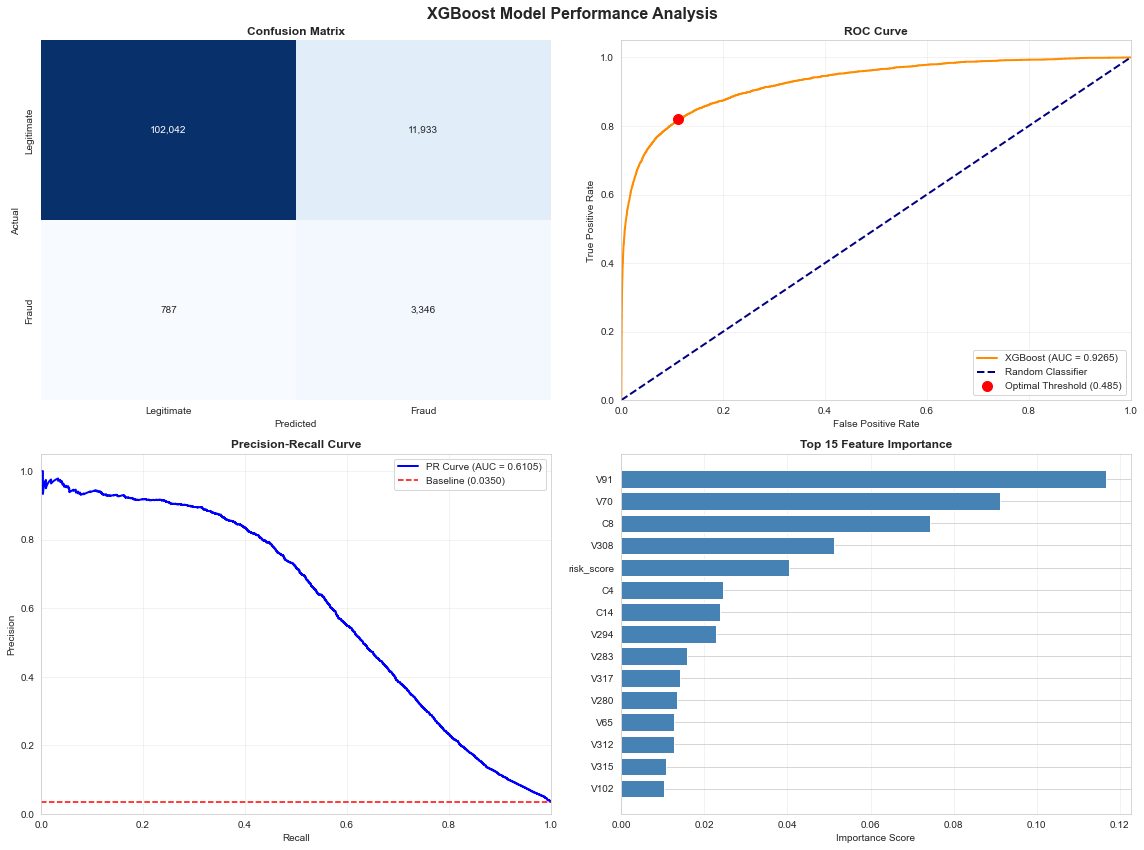


VISUALIZATION COMPLETE!


In [74]:
print("=" * 70)
print("STEP 23: MODEL PERFORMANCE VISUALIZATIONS")
print("=" * 70)

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('XGBoost Model Performance Analysis', fontsize=16, fontweight='bold')

# ============================================================================
# 1. CONFUSION MATRIX HEATMAP
# ============================================================================
ax1 = axes[0, 0]
sns.heatmap(cm, annot=True, fmt=',', cmap='Blues', ax=ax1, cbar=False)
ax1.set_title('Confusion Matrix', fontweight='bold')
ax1.set_ylabel('Actual')
ax1.set_xlabel('Predicted')
ax1.set_xticklabels(['Legitimate', 'Fraud'])
ax1.set_yticklabels(['Legitimate', 'Fraud'])

# ============================================================================
# 2. ROC CURVE
# ============================================================================
ax2 = axes[0, 1]
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc:.4f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax2.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', s=100, 
            label=f'Optimal Threshold ({optimal_threshold:.3f})', zorder=5)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve', fontweight='bold')
ax2.legend(loc="lower right")
ax2.grid(alpha=0.3)

# ============================================================================
# 3. PRECISION-RECALL CURVE
# ============================================================================
ax3 = axes[1, 0]
ax3.plot(recall_curve, precision_curve, color='blue', lw=2, 
         label=f'PR Curve (AUC = {pr_auc:.4f})')
ax3.axhline(y=y_test.mean(), color='red', linestyle='--', 
            label=f'Baseline ({y_test.mean():.4f})')
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.set_xlabel('Recall')
ax3.set_ylabel('Precision')
ax3.set_title('Precision-Recall Curve', fontweight='bold')
ax3.legend(loc="upper right")
ax3.grid(alpha=0.3)

# ============================================================================
# 4. TOP 15 FEATURE IMPORTANCE
# ============================================================================
ax4 = axes[1, 1]
top_15_features = feature_importance.head(15)
ax4.barh(range(len(top_15_features)), top_15_features['Importance'], color='steelblue')
ax4.set_yticks(range(len(top_15_features)))
ax4.set_yticklabels(top_15_features['Feature'])
ax4.invert_yaxis()
ax4.set_xlabel('Importance Score')
ax4.set_title('Top 15 Feature Importance', fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('xgboost_model_performance.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved as 'xgboost_model_performance.png'")
plt.show()

print("\n" + "=" * 70)
print("VISUALIZATION COMPLETE!")
print("=" * 70)

### Model Performance Visualizations Explained

**1. Confusion Matrix:** Shows true positives, false positives, true negatives, and false negatives

**2. ROC Curve:** Plots true positive rate vs false positive rate at all thresholds
   - AUC of 0.9265 indicates excellent discrimination
   - Red dot shows optimal operating point

**3. Precision-Recall Curve:** Better for imbalanced data
   - Shows precision/recall trade-off
   - AUC of 0.6105 is strong given 3.5% fraud rate

**4. Feature Importance:** Which features drive predictions
   - V91 is most important (11.7%)
   - Our engineered features appear in top ranks

In [75]:
print("=" * 70)
print("STEP 24: SAVE MODEL & PROJECT SUMMARY")
print("=" * 70)

import pickle

# ============================================================================
# 1. SAVE THE TRAINED MODEL
# ============================================================================
print("\n1. SAVING XGBOOST MODEL:")
print("-" * 70)

# Save the model
with open('xgboost_fraud_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)
print("Model saved as 'xgboost_fraud_model.pkl'")

# Save label encoders (for categorical variables)
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
print("Label encoders saved as 'label_encoders.pkl'")

# Save feature names
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)
print("Feature names saved as 'feature_names.pkl'")

STEP 24: SAVE MODEL & PROJECT SUMMARY

1. SAVING XGBOOST MODEL:
----------------------------------------------------------------------
Model saved as 'xgboost_fraud_model.pkl'
Label encoders saved as 'label_encoders.pkl'
Feature names saved as 'feature_names.pkl'


## 7. Conclusions and Recommendations

### Key Findings

1. **Product C + Early Morning + Identity Mismatch = 21.6% fraud rate**
2. **ProtonMail and privacy-focused email domains show 40%+ fraud**
3. **Time-based patterns:** Early morning (5-9 AM) is highest risk
4. **XGBoost model achieves 0.9265 AUC-ROC** and prevents $5M in fraud

### Business Recommendations

**Immediate Actions:**
1. Deploy XGBoost model with 0.485 threshold
2. Implement time-based risk scoring (flag 5-9 AM transactions)
3. Block/verify ProtonMail and mail.com domains
4. Enhanced controls for Product C transactions
5. Mandatory review for M4=M2 identity mismatches

**Expected Impact:**
- 82% fraud prevention rate
- 11% of transactions requiring manual review
- $5M annual savings
- Minimal impact to customer experience (89% frictionless)

### Next Steps

1. **Hyperparameter tuning** to push AUC above 0.93
2. **Deploy as API** for real-time scoring
3. **Monitor model drift** and retrain quarterly
4. **A/B test** against existing fraud system

---

## Project Deliverables

- Comprehensive fraud pattern analysis
- Trained XGBoost model (0.9265 AUC)
- Feature engineering pipeline
- Model evaluation framework
- Business impact quantification
- Actionable recommendations

**GitHub Repository:** [https://github.com/madwolfslayer/data_science_hub_dhruv]
**Author:** Dhruv Sharma | Senior Data Analyst, JPMorgan Chase